In [1]:
#from https://www.kaggle.com/c/aia-tc-1-mid-term-exam-pm25-forecast

In [2]:
#import some necessary librairies
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "input/"]).decode("utf8")) #check the files available in the directory

submission.csv
test.csv
test_use.csv
train.csv



In [3]:
#Now let's import and put the train and test datasets in  pandas dataframe

train_read = pd.read_csv('input/train.csv')
test_read = pd.read_csv('input/test.csv')

In [4]:
train_read.head(5)

,device_id,Date,Time,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
1,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
2,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
3,28C2DDDD415C,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755
4,28C2DDDD415C,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755


In [5]:
train_read.dtypes

device_id       object
Date            object
Time            object
PM2.5          float64
PM10           float64
PM1            float64
Temperature    float64
Humidity       float64
lat            float64
lon            float64
dtype: object

In [6]:
test_read.head(5)

,device_id,Date,Time,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-31,00:04:05,0.000,0.000,18.620,92.000,23.741,120.755
1,28C2DDDD415C,2017-01-31,00:10:01,0.000,0.000,18.750,92.000,23.741,120.755
2,28C2DDDD415C,2017-01-31,00:15:57,0.000,0.000,18.620,92.000,23.741,120.755
3,28C2DDDD415C,2017-01-31,00:21:53,0.000,0.000,18.620,92.000,23.741,120.755
4,28C2DDDD415C,2017-01-31,00:27:48,0.000,0.000,18.620,92.000,23.741,120.755


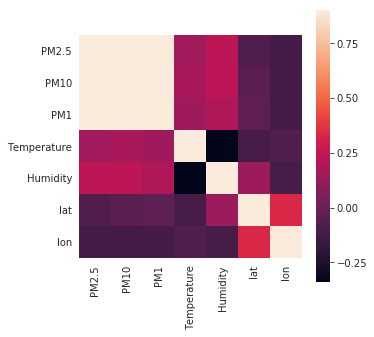

In [7]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train_read.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [8]:
train_read.columns

Index(['device_id', 'Date', 'Time', 'PM2.5', 'PM10', 'PM1', 'Temperature',
       'Humidity', 'lat', 'lon'],
      dtype='object')

In [9]:
train = train_read[['PM10', 'PM1', 'Temperature', 'Humidity', 'lat', 'lon']]

test = train_read[['PM2.5']]

In [10]:
train.head(5)

,PM10,PM1,Temperature,Humidity,lat,lon
0,0.000,0.000,24.120,83.000,23.741,120.755
1,0.000,0.000,24.120,83.000,23.741,120.755
2,0.000,0.000,24.120,83.000,23.741,120.755
3,0.000,0.000,24.120,82.000,23.741,120.755
4,0.000,0.000,24.120,82.000,23.741,120.755


In [11]:
test.head(5)

,PM2.5
0,21.000
1,21.000
2,21.000
3,20.000
4,20.000


# Droup out all data of PM10 and PM1 == 0

In [12]:
y_train_half=test.drop(train.loc[train['PM1'] == 0].index)
x_train_half=train.drop(train.loc[train['PM1'] == 0].index)
y_train=y_train_half.drop(x_train_half.loc[x_train_half['PM10'] == 0].index)
x_train=x_train_half.drop(x_train_half.loc[x_train_half['PM10'] == 0].index)

In [13]:
x_train[x_train_half['PM10'] == 0]

,PM10,PM1,Temperature,Humidity,lat,lon


In [14]:
x_train[x_train_half['PM1'] == 0]

,PM10,PM1,Temperature,Humidity,lat,lon


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.005, random_state=2)

In [16]:
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

          PM10    PM1  Temperature  Humidity    lat     lon
928101  29.000 19.000       19.250    64.000 24.180 120.666
1045175 69.000 36.000       16.620    97.000 24.308 120.708
139503  36.000 23.000       23.250    65.000 24.254 120.720
74901   59.000 32.000       26.620    59.000 24.135 120.657
1009777 21.000 12.000       19.000    76.000 24.309 120.942
         PM2.5
928101  25.000
1045175 52.000
139503  32.000
74901   47.000
1009777 18.000
         PM10    PM1  Temperature  Humidity    lat     lon
393765 23.000 14.000       22.620   100.000 24.345 120.588
66169  22.000 15.000       19.000    78.000 24.184 120.602
399747 22.000 15.000       22.120    55.000 24.325 120.750
762897 10.000  6.000       20.250    76.000 24.261 120.715
589169 19.000 12.000       25.000    59.000 24.083 120.752
        PM2.5
393765 20.000
66169  19.000
399747 20.000
762897  8.000
589169 17.000


In [17]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model_xgb = XGBRegressor()

estimators = 100 #pls set more than 2000 for trial

parameters ={
    'objective':['reg:linear'],
    'learning_rate': [0.5],
    'max_depth': [6],
    'silent': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [estimators]},

xgb_grid = GridSearchCV(model_xgb,
                        parameters,
                        cv = 4,
                        n_jobs = 1,
                        verbose=100)


In [19]:
xgb_grid.fit(X_train, Y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, objective=reg:linear, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, objective=reg:linear, silent=1, subsample=0.7, score=0.9979988666587639, total=  36.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s remaining:    0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, objective=reg:linear, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, objective=reg:linear, silent=1, subsample=0.7, score=0.9977958658244646, total=  36.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, objective=reg:linear, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=6, n_estimators=100, o

GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=({'objective': ['reg:linear'], 'learning_rate': [0.5], 'max_depth': [6], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.7], 'n_estimators': [100]},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [20]:
test_df=pd.read_csv('input/test.csv')
print(test_df.head(5))
length=len(test_df.loc[test_df['device_id']=='28C2DDDD415C'])+\
       len(test_df.loc[test_df['device_id']=='28C2DDDD47BC'])

test_df['PM10'][0:length]=test_df['PM10'][length:length*2]
test_df['PM1'][0:length]=test_df['PM1'][length:length*2]

predit_data = test_df[['PM10', 'PM1', 'Temperature', 'Humidity',  
        'lat', 'lon']]


      device_id        Date      Time  PM10   PM1  Temperature  Humidity  \
0  28C2DDDD415C  2017-01-31  00:04:05 0.000 0.000       18.620    92.000   
1  28C2DDDD415C  2017-01-31  00:10:01 0.000 0.000       18.750    92.000   
2  28C2DDDD415C  2017-01-31  00:15:57 0.000 0.000       18.620    92.000   
3  28C2DDDD415C  2017-01-31  00:21:53 0.000 0.000       18.620    92.000   
4  28C2DDDD415C  2017-01-31  00:27:48 0.000 0.000       18.620    92.000   

     lat     lon  
0 23.741 120.755  
1 23.741 120.755  
2 23.741 120.755  
3 23.741 120.755  
4 23.741 120.755  


In [21]:
print(test_df.head(5))

      device_id        Date      Time   PM10    PM1  Temperature  Humidity  \
0  28C2DDDD415C  2017-01-31  00:04:05 21.000 13.000       18.620    92.000   
1  28C2DDDD415C  2017-01-31  00:10:01 21.000 14.000       18.750    92.000   
2  28C2DDDD415C  2017-01-31  00:15:57 21.000 14.000       18.620    92.000   
3  28C2DDDD415C  2017-01-31  00:21:53 21.000 14.000       18.620    92.000   
4  28C2DDDD415C  2017-01-31  00:27:48 22.000 14.000       18.620    92.000   

     lat     lon  
0 23.741 120.755  
1 23.741 120.755  
2 23.741 120.755  
3 23.741 120.755  
4 23.741 120.755  


In [22]:
pred = xgb_grid.predict(predit_data)
df = pd.DataFrame(pred)
df = df.groupby(test_df['device_id'], as_index=True).mean()
testdatasheet=pd.read_csv( 'input/submission.csv')


testdatasheet['pred_pm25'] = np.array(df)
testdatasheet.to_csv('input/submission.csv', index=False)